# Explorando la Regresión Lineal, sus tipos y Pronosticos

Este documento será actualizado periodicamente con experimentos en los siguientes temas:

* Algunas pruebas con la Media, Mediana, Desviación Média Absoluta(MAD)
* Regresión Lineal Simple
* Regresión Lineal Multiple
* Pronostico mediante Regresión
* Regresión Polinomial
El Dataset utilizado para la regreción lineal lo puedes encontrar en: https://www.kaggle.com/mirichoi0218/insurance/metadata 

### Pruebas de Estadisticos

In [42]:
import numpy as np
# Creamos un array con el que trabajaremos la Desviación (Media o Mediana) Absoluta
# La MAD, tiende a ser menos sencible a los valores atipicos (outliers) se usa para estimar la media o mediana
# Se usa para la estimación de desviación estandar
data_test1  = np.array([2, 6, 6, 12, 17, 25 ,32], dtype=np.int8)
_median     = np.median(data_test1)
abs_median = np.copy(data_test1)
_MAD        = 0
k           = 1.4826 # es una constnte de ajust que se usa para escalar la desviación estandar

# sustraemos la mediana para cada valor del arreglo y tomamos el valor absoluto
for idx in range(len(data_test1)):
    abs_median[idx] = abs(abs_median[idx] - _median)

# recalculamos la mediana
MAD = np.median(abs_median)*k
# finalmente creamos un umbral para la desviación mediana absoluta
up_outlier   = _median + (2 * MAD)
low_outlier   = _median - (2 * MAD)

print(f"Mediana -> {_median}")
print(f"MAD -> {MAD}")
print(f"Upper threshold -> {up_outlier}")
print(f"Lower threshold -> {low_outlier}")


Media -> 14.285714285714286
Mediana -> 12.0
MAD -> 8.8956
Upper threshold -> 29.7912
Lower threshold -> -5.7912


### Regresión Lineal Simple
La finalidad de este ejercicio es predecir el costo de atención médica de un paciente según parámetros como:
* edad
* género
* hábito de fumar
* lugar de residencia

In [7]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as ppl
import pprint as pp
from sklearn.linear_model import LinearRegression

DATADIR = Path().resolve() / '../data'
PATIENTSDF = DATADIR / 'insurance.csv'

# lea el dataset de pacientes 
patients_df = pd.read_csv(PATIENTSDF)
patients_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


* Identificamos variables sobre las que haremos predicción

In [2]:
# Obtenemos las varaibles, features, predictores, o caracteristicas del dataset
predictors = patients_df.columns
outcome = 'charges' # queremos que charges sea la variable objetivo o target.
# Identificamos el tipo de dato de cada columna
predictors_type = patients_df.dtypes
pp.PrettyPrinter( indent = 4 )
pp.pprint(f"Predictors types-> \n{predictors_type}")

('Predictors types-> \n'
 'age           int64\n'
 'sex          object\n'
 'bmi         float64\n'
 'children      int64\n'
 'smoker       object\n'
 'region       object\n'
 'charges     float64\n'
 'dtype: object')


* Procedo a graficar la distribución de los valores en cada columna

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

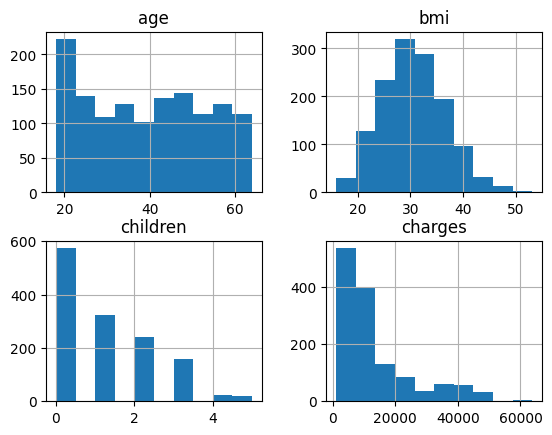

In [6]:
# hacemos uso del método his() de pandas, que nos permita observar la distribución de cada variable
patients_df[predictors].hist()

for column in patients_df:
    ppl.subplot()